### Importar librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Cargar Dataset

In [2]:
path = "../Data/conducta_suicida.csv"

In [3]:
# Revisamos el contenido del dataset
df = pd.read_csv(path)
df.head()

,_id,ano_notificacion,codigo_localidadresidencia,localidad_residencia,nombre_upz,Curso de vida,clasificaciondelaconducta,sexo,edad,niveleducativo,enfermedades_dolorosas,maltrato_sexual,muerte_familiar,conflicto_pareja,problemas_economicos,esc_educ,problemas_juridicos,problemas_laborales,suicidio_amigo,poblacion_diferencial
0,1,2016,3,Santa Fe,LAS CRUCES,12 â€“ 17 Adolescencia,IdeaciÃ³n suicida,Mujer,14,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
1,2,2012,8,Kennedy,UPZ Sin asignar,12 â€“ 17 Adolescencia,IdeaciÃ³n suicida,Hombre,13,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
2,3,2012,19,Ciudad BolÃ­var,UPZ Sin asignar,12 â€“ 17 Adolescencia,Intento de Suicidio,Mujer,13,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
3,4,2012,10,EngativÃ¡,UPZ Sin asignar,18 â€“ 28 Juventud,Intento de Suicidio,Mujer,26,8. TÃ©cnico post-secundaria completa,0,0,0,0,0,0,0,0,0,NaN
4,5,2012,10,EngativÃ¡,UPZ Sin asignar,18 â€“ 28 Juventud,Intento de Suicidio,Mujer,26,6. Secundaria completa,0,0,0,0,0,0,0,0,0,NaN


Como las columnas _id y codigo_localidadresidencia son variables tipo índice, las eliminamos del dataset.

In [4]:
del df['_id']
del df['codigo_localidadresidencia']
df.head()

,ano_notificacion,localidad_residencia,nombre_upz,Curso de vida,clasificaciondelaconducta,sexo,edad,niveleducativo,enfermedades_dolorosas,maltrato_sexual,muerte_familiar,conflicto_pareja,problemas_economicos,esc_educ,problemas_juridicos,problemas_laborales,suicidio_amigo,poblacion_diferencial
0,2016,Santa Fe,LAS CRUCES,12 â€“ 17 Adolescencia,IdeaciÃ³n suicida,Mujer,14,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
1,2012,Kennedy,UPZ Sin asignar,12 â€“ 17 Adolescencia,IdeaciÃ³n suicida,Hombre,13,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
2,2012,Ciudad BolÃ­var,UPZ Sin asignar,12 â€“ 17 Adolescencia,Intento de Suicidio,Mujer,13,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
3,2012,EngativÃ¡,UPZ Sin asignar,18 â€“ 28 Juventud,Intento de Suicidio,Mujer,26,8. TÃ©cnico post-secundaria completa,0,0,0,0,0,0,0,0,0,NaN
4,2012,EngativÃ¡,UPZ Sin asignar,18 â€“ 28 Juventud,Intento de Suicidio,Mujer,26,6. Secundaria completa,0,0,0,0,0,0,0,0,0,NaN


### Data Wrangling

Identificamos valores faltantes en el dataset.

In [5]:
df.isnull().sum()

ano_notificacion                 0
localidad_residencia             0
nombre_upz                       0
Curso de vida                    0
clasificaciondelaconducta        0
sexo                             0
edad                             0
niveleducativo                   0
enfermedades_dolorosas           0
maltrato_sexual                  0
muerte_familiar                  0
conflicto_pareja                 0
problemas_economicos             0
esc_educ                         0
problemas_juridicos              0
problemas_laborales              0
suicidio_amigo                   0
poblacion_diferencial        20093
dtype: int64

Como podemos ver la única columna con valores nulos es <b>poblacion_diferencial</b> con una aproximación de 20.093 valores faltantes. Observemos los valores únicos de la columna:

In [6]:
poblacion_value_counts = df['poblacion_diferencial'].value_counts()
poblacion_value_counts

poblacion_diferencial
Ninguna                                94139
Otra                                   77435
Consumidor habitual de SPA              8019
PoblaciÃ³n LGBTIQ+                      6612
Madre Cabeza de Hogar                   2564
Trabajador Informal                     1086
En ProtecciÃ³n                          1044
Servidor pÃºblico                        692
Otro tipo de vÃ­ctima del conflicto      644
Menor Abandonado                         167
Name: count, dtype: int64

Reemplacemos los valores con la frecuencia o moda (<b>Ninguna</b>). 

In [7]:
df["poblacion_diferencial"].replace(np.nan, "Ninguna", inplace=True)

C:\Users\Dilan\AppData\Local\Temp\ipykernel_8916\4224689922.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["poblacion_diferencial"].replace(np.nan, "Ninguna", inplace=True)


Nos aseguramos de que la data haya quedado sin valores nulos.

In [8]:
df.isnull().sum()

ano_notificacion             0
localidad_residencia         0
nombre_upz                   0
Curso de vida                0
clasificaciondelaconducta    0
sexo                         0
edad                         0
niveleducativo               0
enfermedades_dolorosas       0
maltrato_sexual              0
muerte_familiar              0
conflicto_pareja             0
problemas_economicos         0
esc_educ                     0
problemas_juridicos          0
problemas_laborales          0
suicidio_amigo               0
poblacion_diferencial        0
dtype: int64

Muy bien, ahora procedemos a reemplazar los caracteres especiales de las columnas categóricas.

In [9]:
#Replacing special characters in localidad_residencia
df['localidad_residencia'] = df['localidad_residencia'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
#Replacing special characters in nombre_upz
df['nombre_upz'] = df['nombre_upz'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
#Replacing special characters in Curso de vida
df['Curso de vida'] = df['Curso de vida'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
#Replacing special characters in clasificaciondelaconducta
df['clasificaciondelaconducta'] = df['clasificaciondelaconducta'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
#Replacing special characters in sexo
df['sexo'] = df['sexo'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
#Replacing special characters in niveleducativo
df['niveleducativo'] = df['niveleducativo'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
#Replacing special characters in poblacion_diferencial
df['poblacion_diferencial'] = df['poblacion_diferencial'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)


Para asegurarnos de que se hayan reemplazado los caracteres especiales, podemos realizar un conteo de los valores únicos por cada variable categórica.

In [10]:
categorical_variables = [ 
                      "localidad_residencia",
                      "nombre_upz",
                      "Curso de vida",
                      "clasificaciondelaconducta",
                      "sexo",
                      "niveleducativo",
                      "poblacion_diferencial"]
df[categorical_variables].apply(lambda col: print(f"\nConteo de valores únicos para la variable: {col.name}\n{col.value_counts()}"))


Conteo de valores únicos para la variable: localidad_residencia
localidad_residencia
Kennedy               28115
Suba                  25869
Bosa                  23501
Ciudad Bolvar         21686
Engativ               19300
Usme                  13587
San Cristbal          11694
Rafael Uribe Uribe    11412
Fontibn               10855
Usaqun                10583
Puente Aranda          6950
Tunjuelito             6327
Teusaquillo            4585
Barrios Unidos         3978
Santa Fe               3812
Chapinero              3579
Los Mrtires            2929
Antonio Nario          2555
La Candelaria           828
Sumapaz                 238
Sin dato                112
Name: count, dtype: int64

Conteo de valores únicos para la variable: nombre_upz
nombre_upz
UPZ Sin asignar         10034
BOSA CENTRAL             8054
BOSA OCCIDENTAL          6819
EL RINCON                6729
TIBABUYES                5882
                        ...  
PARQUE SALITRE             40
AEROPUERTO EL DORADO    

localidad_residencia         None
nombre_upz                   None
Curso de vida                None
clasificaciondelaconducta    None
sexo                         None
niveleducativo               None
poblacion_diferencial        None
dtype: object

In [11]:
# Análisis por localidad_residencia
df['localidad_residencia'].value_counts()

localidad_residencia
Kennedy               28115
Suba                  25869
Bosa                  23501
Ciudad Bolvar         21686
Engativ               19300
Usme                  13587
San Cristbal          11694
Rafael Uribe Uribe    11412
Fontibn               10855
Usaqun                10583
Puente Aranda          6950
Tunjuelito             6327
Teusaquillo            4585
Barrios Unidos         3978
Santa Fe               3812
Chapinero              3579
Los Mrtires            2929
Antonio Nario          2555
La Candelaria           828
Sumapaz                 238
Sin dato                112
Name: count, dtype: int64

Como hay valores que aparecen como Sin Dato en la variable localidad_residencia, se reemplazan por la moda.

In [12]:
df['localidad_residencia']
df.loc[df['localidad_residencia'] == 'Sin dato', 'localidad_residencia'] = 'Kennedy'
df['localidad_residencia'].value_counts()

localidad_residencia
Kennedy               28227
Suba                  25869
Bosa                  23501
Ciudad Bolvar         21686
Engativ               19300
Usme                  13587
San Cristbal          11694
Rafael Uribe Uribe    11412
Fontibn               10855
Usaqun                10583
Puente Aranda          6950
Tunjuelito             6327
Teusaquillo            4585
Barrios Unidos         3978
Santa Fe               3812
Chapinero              3579
Los Mrtires            2929
Antonio Nario          2555
La Candelaria           828
Sumapaz                 238
Name: count, dtype: int64

In [13]:
# Análisis de la variable nombre_upz
df['nombre_upz'].value_counts()

nombre_upz
UPZ Sin asignar         10034
BOSA CENTRAL             8054
BOSA OCCIDENTAL          6819
EL RINCON                6729
TIBABUYES                5882
                        ...  
PARQUE SALITRE             40
AEROPUERTO EL DORADO       30
EL MOCHUELO                25
GUAYMARAL                   5
LA ACADEMIA                 3
Name: count, Length: 113, dtype: int64

In [14]:
# Análisis por nivel educativo
df['niveleducativo'].value_counts()

niveleducativo
5 Secundaria incompleta               77159
6 Secundaria completa                 41928
9 Universidad incompleta              18727
3 Primaria incompleta                 16628
8 Tcnico postsecundaria completa      13397
10 Universidad completa               12610
99 Sin dato                           11798
4 Primaria completa                    9217
7 Tcnico postsecundaria incompleta     4287
12 Postgrado completo                  2261
1 No fue a la escuela                  1121
7 Tcnico pos secundaria incompleto      931
8 Tcnico pos secundaria completo        870
11 Postgrado incompleto                 715
2 Preescolar                            668
11 Posgrado incompleto                  105
12 Posgrado completo                     73
Name: count, dtype: int64

In [15]:
# Estandarizamos los valores de la variable
nivel_educativo_replacements = {
  '5 Secundaria incompleta': 'Secundaria incompleta',
  '6 Secundaria completa': 'Secundaria completa',
  '99 Sin dato': 'Secundaria incompleta', #Es este caso reemplazo Sin Dato por la moda
  '9 Universidad incompleta': 'Universidad incompleta',
  '8 Tcnico postsecundaria completa': 'Técnico o Tecnólogo completo',
  '10 Universidad completa': 'Universidad completa',
  '4 Primaria completa' : 'Primaria completa',
  '3 Primaria incompleta' : 'Primaria incompleta',
  '7 Tcnico postsecundaria incompleta' : 'Técnico o Tecnólogo incompleto',
  '7 Tcnico pos secundaria incompleto' : 'Técnico o Tecnólogo incompleto',
  '8 Tcnico pos secundaria completo' : 'Técnico o Tecnólogo completo',
  '12 Postgrado completo' : 'Postgrado completo',
  '8 Tcnico pos secundaria completo' : 'Técnico o Tecnólogo completo',
  '1 No fue a la escuela' : 'No fue a la escuela',
  '11 Postgrado incompleto' : 'Posgrado incompleto',
  '2 Preescolar' : 'Preescolar',
  '11 Posgrado incompleto' : 'Posgrado incompleto',
  '12 Posgrado completo' : 'Posgrado completo',
  '12 Posgrado completo ' : 'Posgrado completo',
  'Postgrado completo' : 'Posgrado completo'
  }
df['niveleducativo'] = df['niveleducativo'].replace(nivel_educativo_replacements)
df['niveleducativo'].value_counts()

niveleducativo
Secundaria incompleta             88957
Secundaria completa               41928
Universidad incompleta            18727
Primaria incompleta               16628
Técnico o Tecnólogo completo      14267
Universidad completa              12610
Primaria completa                  9217
Técnico o Tecnólogo incompleto     5218
Postgrado completo                 2261
No fue a la escuela                1121
Posgrado incompleto                 820
Preescolar                          668
Posgrado completo                    73
Name: count, dtype: int64

In [16]:
# Análisis por curso de vida
df['Curso de vida'].value_counts()

Curso de vida
12  17 Adolescencia      70970
18  28 Juventud          66723
29  59 Adultez           52115
6  11 Infancia           16060
60 Vejez                  6276
0  5 Primera Infancia      351
Name: count, dtype: int64

In [17]:
# Corregimos un poco los valores
curso_vida_replacements = {
  '0  5 Primera Infancia': 'Primera Infancia',
  '6  11 Infancia': 'Infancia',
  '12  17 Adolescencia': 'Adolescencia',
  '18  28 Juventud': 'Juventud',
  '29  59 Adultez': 'Adultez',
  '60 Vejez': 'Vejez'
  }
# Se reemplazan los valores
df['Curso de vida'] = df['Curso de vida'].replace(curso_vida_replacements)
df['Curso de vida'].value_counts()

Curso de vida
Adolescencia        70970
Juventud            66723
Adultez             52115
Infancia            16060
Vejez                6276
Primera Infancia      351
Name: count, dtype: int64

### Corregir los tipos de datos

In [22]:
df.dtypes

ano_notificacion              int64
localidad_residencia         object
nombre_upz                   object
Curso de vida                object
clasificaciondelaconducta    object
sexo                         object
edad                          int64
niveleducativo               object
enfermedades_dolorosas         bool
maltrato_sexual                bool
muerte_familiar                bool
conflicto_pareja               bool
problemas_economicos           bool
esc_educ                       bool
problemas_juridicos            bool
problemas_laborales            bool
suicidio_amigo                 bool
poblacion_diferencial        object
dtype: object

In [23]:
# A las columnas booleanas se les asigna el tipo de dato booleano
df['enfermedades_dolorosas'] = df['enfermedades_dolorosas'].astype(bool)
df['maltrato_sexual'] = df['maltrato_sexual'].astype(bool)
df['muerte_familiar'] = df['muerte_familiar'].astype(bool)
df['conflicto_pareja'] = df['conflicto_pareja'].astype(bool)
df['problemas_economicos'] = df['problemas_economicos'].astype(bool)
df['problemas_juridicos'] = df['problemas_juridicos'].astype(bool)
df['problemas_laborales'] = df['problemas_laborales'].astype(bool)
df['suicidio_amigo'] = df['suicidio_amigo'].astype(bool)
df['esc_educ'] = df['esc_educ'].astype(bool)

In [24]:
# Verificamos los cambios
df.dtypes

ano_notificacion              int64
localidad_residencia         object
nombre_upz                   object
Curso de vida                object
clasificaciondelaconducta    object
sexo                         object
edad                          int64
niveleducativo               object
enfermedades_dolorosas         bool
maltrato_sexual                bool
muerte_familiar                bool
conflicto_pareja               bool
problemas_economicos           bool
esc_educ                       bool
problemas_juridicos            bool
problemas_laborales            bool
suicidio_amigo                 bool
poblacion_diferencial        object
dtype: object

In [25]:
df.head()

,ano_notificacion,localidad_residencia,nombre_upz,Curso de vida,clasificaciondelaconducta,sexo,edad,niveleducativo,enfermedades_dolorosas,maltrato_sexual,muerte_familiar,conflicto_pareja,problemas_economicos,esc_educ,problemas_juridicos,problemas_laborales,suicidio_amigo,poblacion_diferencial
0,2016,Santa Fe,LAS CRUCES,Adolescencia,Ideacin suicida,Mujer,14,Secundaria incompleta,False,False,False,False,False,False,False,False,False,Otra
1,2012,Kennedy,UPZ Sin asignar,Adolescencia,Ideacin suicida,Hombre,13,Secundaria incompleta,False,False,False,False,False,False,False,False,False,Otra
2,2012,Ciudad Bolvar,UPZ Sin asignar,Adolescencia,Intento de Suicidio,Mujer,13,Secundaria incompleta,False,False,False,False,False,False,False,False,False,Otra
3,2012,Engativ,UPZ Sin asignar,Juventud,Intento de Suicidio,Mujer,26,Técnico o Tecnólogo completo,False,False,False,False,False,False,False,False,False,Ninguna
4,2012,Engativ,UPZ Sin asignar,Juventud,Intento de Suicidio,Mujer,26,Secundaria completa,False,False,False,False,False,False,False,False,False,Ninguna


### Análisis descriptivo de las variables numéricas

In [26]:
df.describe()

,ano_notificacion,edad
count,212495.000000,212495.000000
mean,2020.481037,24.372649
std,3.278523,13.720469
min,2012.000000,1.000000
25%,2018.000000,15.000000
50%,2022.000000,20.000000
75%,2023.000000,30.000000
max,2024.000000,99.000000


### Análisis de la variable objetivo clasificaciondelaconducta

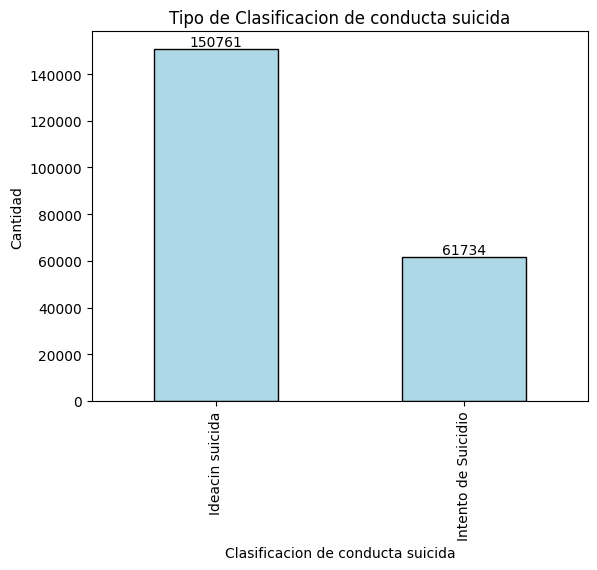

In [27]:
# Análisis de la clasificación de la conducta
#Crear gráfico de barras
clasificacion_conteo = df['clasificaciondelaconducta'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')

# Agregar texto encima de cada barra
clasificacion_conteo.bar_label(clasificacion_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('Clasificacion de conducta suicida')
plt.ylabel('Cantidad')
plt.title('Tipo de Clasificacion de conducta suicida')

# Mostrar gráfico
plt.show()

Nos vamos a enfocar en la población que realizó un <b>Intento de Suicidio</b>

In [28]:
# Se crea un dataframe donde solamente hubo intento de suicidio 
df_intento_suicidio = df[df['clasificaciondelaconducta'] == "Intento de Suicidio"]
df_intento_suicidio.describe()

,ano_notificacion,edad
count,61734.000000,61734.000000
mean,2019.652023,24.748874
std,3.598126,11.998532
min,2012.000000,1.000000
25%,2017.000000,16.000000
50%,2021.000000,21.000000
75%,2023.000000,29.000000
max,2024.000000,99.000000


### Análisis con las variables tipo texto

<Axes: title={'center': 'Grupos de edad'}, ylabel='count'>

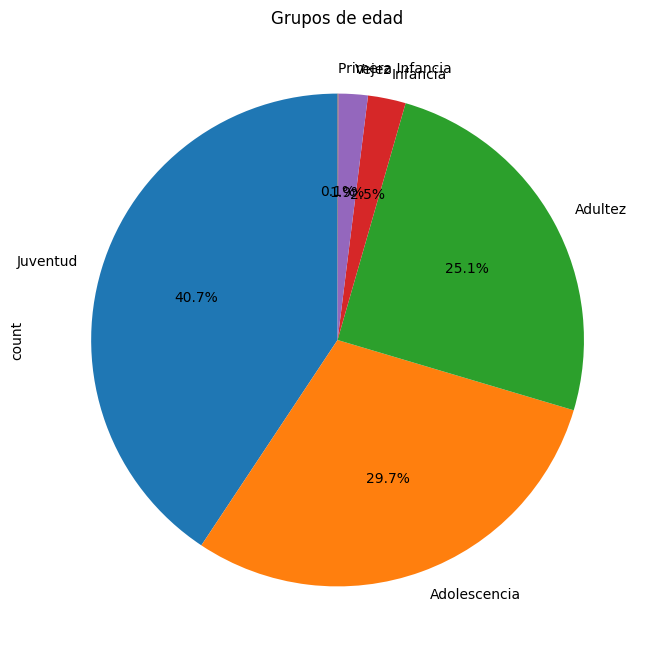

In [29]:
# Observemos la distribución en un diagrama de torta
df_intento_suicidio['Curso de vida'].value_counts().plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    startangle=90,
    title='Grupos de edad'
)

Como los datos de los grupos de primera infancia (0 a 5 años) e infancia (6 a 11 años) son muy pequeños, se decide incluirlos en el grupo de adolescencia. Lo mismo sucede con el grupo vejez (mayores de 60 años), se incluye en grupo poblacional de adultez (29 a 59 años). 

In [30]:
# Reemplazo de valores 0  5 Primera Infancia
df_intento_suicidio['Curso de vida'] = df_intento_suicidio['Curso de vida'].replace('Primera Infancia','Adolescencia')
# Reemplazo de valores 6  11 Infancia
df_intento_suicidio['Curso de vida'] = df_intento_suicidio['Curso de vida'].replace('Infancia','Adolescencia')
# Reemplazo de valores 60 Vejez
df_intento_suicidio['Curso de vida'] = df_intento_suicidio['Curso de vida'].replace('Vejez','Adultez')

C:\Users\Dilan\AppData\Local\Temp\ipykernel_8916\1081349939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intento_suicidio['Curso de vida'] = df_intento_suicidio['Curso de vida'].replace('Primera Infancia','Adolescencia')
C:\Users\Dilan\AppData\Local\Temp\ipykernel_8916\1081349939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intento_suicidio['Curso de vida'] = df_intento_suicidio['Curso de vida'].replace('Infancia','Adolescencia')
C:\Users\Dilan\AppData\Local\Temp\ipykernel_8916\108134993

Hacemos lo mismo con el dataframe principal:

In [31]:
# Reemplazo de valores 0  5 Primera Infancia
df['Curso de vida'] = df['Curso de vida'].replace('Primera Infancia','Adolescencia')
# Reemplazo de valores 6  11 Infancia
df['Curso de vida'] = df['Curso de vida'].replace('Infancia','Adolescencia')
# Reemplazo de valores 60 Vejez
df['Curso de vida'] = df['Curso de vida'].replace('Vejez','Adultez')

Volvemos a graficar la distribución del grupo de edad.

<Axes: title={'center': 'Grupos de edad'}, ylabel='count'>

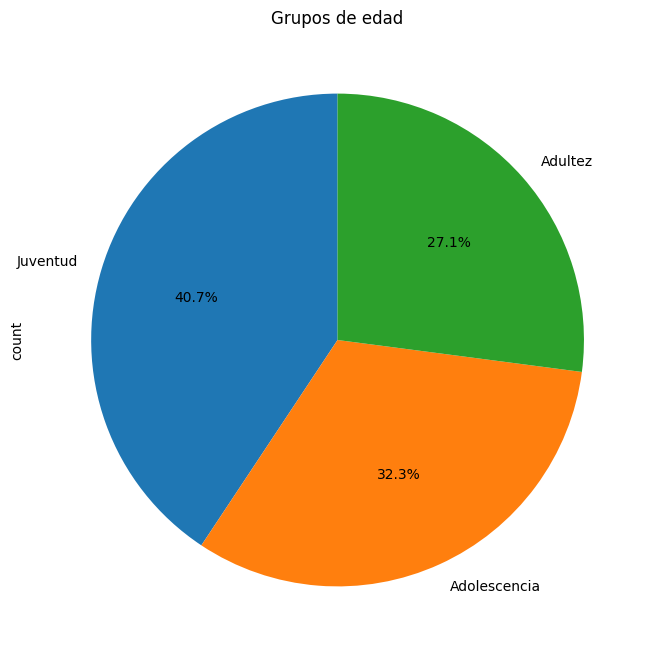

In [32]:
df_intento_suicidio['Curso de vida'].value_counts().plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    startangle=90,
    title='Grupos de edad'
)

<Axes: title={'center': 'Sexo'}, ylabel='count'>

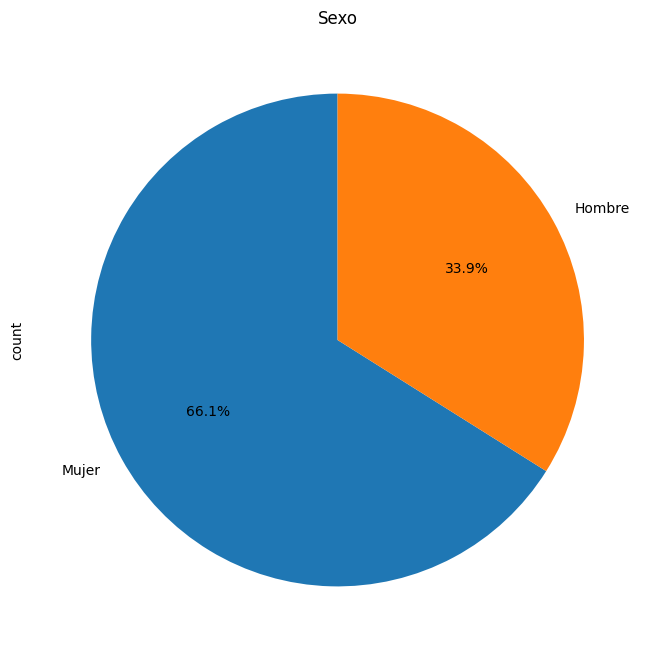

In [33]:
# Análisis por el sexo
df_intento_suicidio['sexo'].value_counts().plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    startangle=90,
    title='Sexo'
)

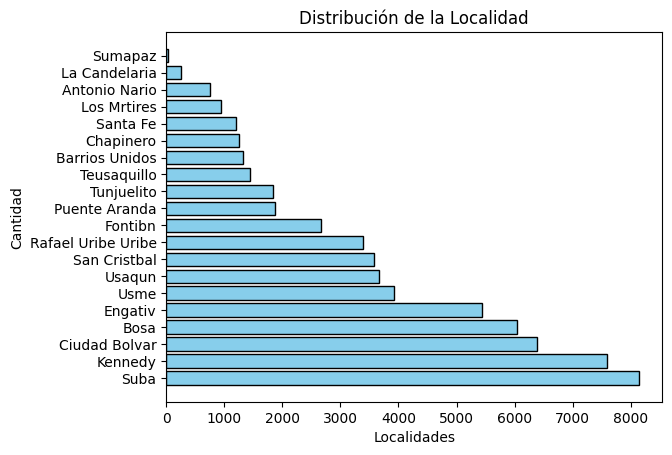

In [34]:
# Análisis de localidad_residencia
#Crear gráfico de barras
localidad_count = df_intento_suicidio['localidad_residencia'].value_counts()

# Crear gráfica de barras
plt.barh(localidad_count.index, localidad_count.values, color="skyblue", edgecolor="black")

# Agregar etiquetas
plt.xlabel('Localidades')
plt.ylabel('Cantidad')
plt.title('Distribución de la Localidad')

# Mostrar gráfico
plt.show()

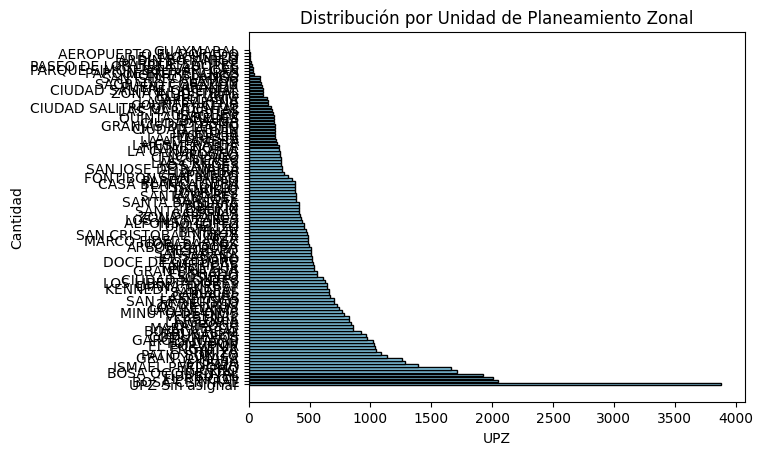

In [35]:
# Análisis de nombre_upz
#Crear gráfico de barras
upz_count = df_intento_suicidio['nombre_upz'].value_counts()

# Crear gráfica de barras
plt.barh(upz_count.index, upz_count.values, color="skyblue", edgecolor="black")

# Agregar etiquetas
plt.xlabel('UPZ')
plt.ylabel('Cantidad')
plt.title('Distribución por Unidad de Planeamiento Zonal')

# Mostrar gráfico
plt.show()

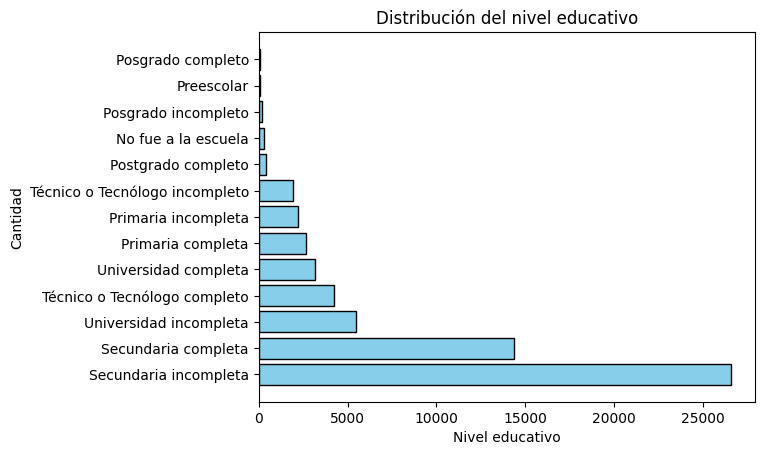

In [36]:
# Análisis con el nivel educativo
#Crear gráfico de barras
educacion_conteo = df_intento_suicidio['niveleducativo'].value_counts()

# Crear gráfica de barras
plt.barh(educacion_conteo.index, educacion_conteo.values, color="skyblue", edgecolor="black")

# Agregar etiquetas
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad')
plt.title('Distribución del nivel educativo')

# Mostrar gráfico
plt.show()

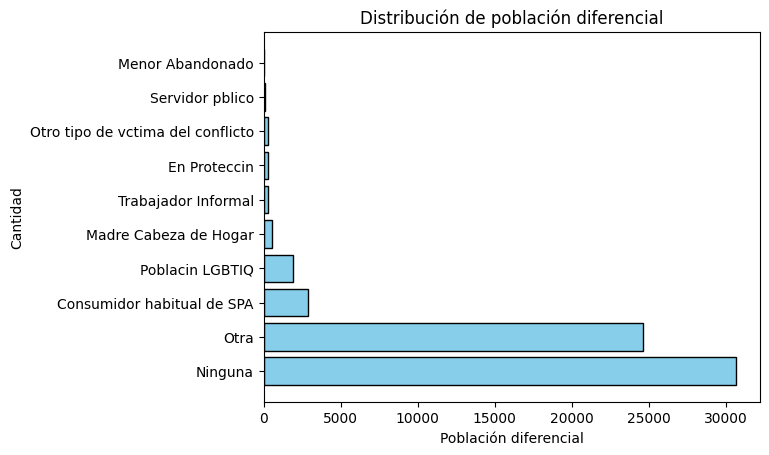

In [37]:
# Análisis con poblacion_diferencial
#Crear gráfico de barras
poblacion_conteo = df_intento_suicidio['poblacion_diferencial'].value_counts()

# Crear gráfica de barras
plt.barh(poblacion_conteo.index, poblacion_conteo.values, color="skyblue", edgecolor="black")

# Agregar etiquetas
plt.xlabel('Población diferencial')
plt.ylabel('Cantidad')
plt.title('Distribución de población diferencial')

# Mostrar gráfico
plt.show()

### Análisis con las variables tipo booleanas

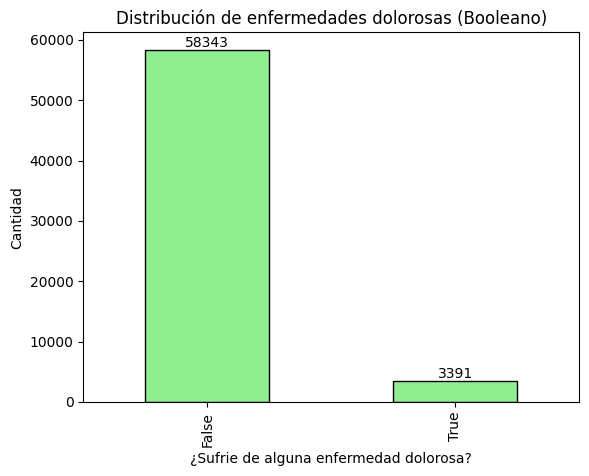

In [38]:
# Análisis de enfermedades dolorosas
#Crear gráfico de barras
enfermedades_conteo = df_intento_suicidio['enfermedades_dolorosas'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
enfermedades_conteo.bar_label(enfermedades_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Sufrie de alguna enfermedad dolorosa?')
plt.ylabel('Cantidad')
plt.title('Distribución de enfermedades dolorosas (Booleano)')

# Mostrar gráfico
plt.show()

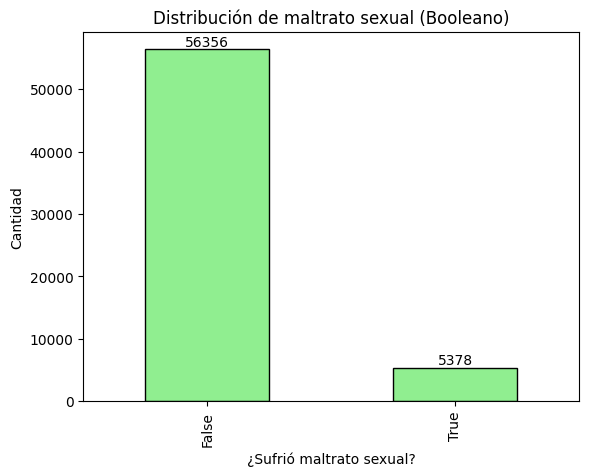

In [39]:
# Análisis de maltrato sexual
#Crear gráfico de barras
maltrato_sexual_conteo = df_intento_suicidio['maltrato_sexual'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
maltrato_sexual_conteo.bar_label(maltrato_sexual_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Sufrió maltrato sexual?')
plt.ylabel('Cantidad')
plt.title('Distribución de maltrato sexual (Booleano)')

# Mostrar gráfico
plt.show()

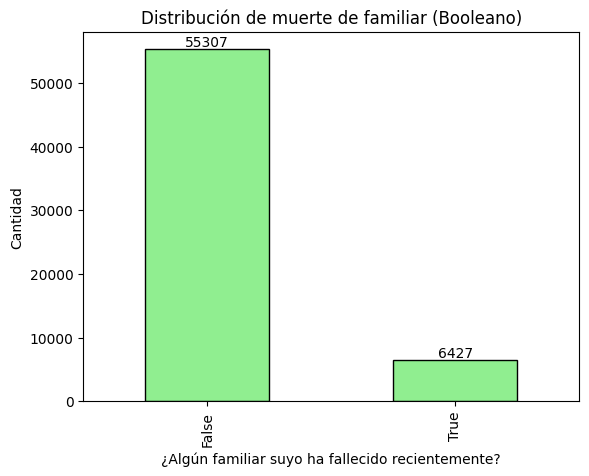

In [40]:
# Análisis de muerte de familiar
#Crear gráfico de barras
muerte_familiar_conteo = df_intento_suicidio['muerte_familiar'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
muerte_familiar_conteo.bar_label(muerte_familiar_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Algún familiar suyo ha fallecido recientemente?')
plt.ylabel('Cantidad')
plt.title('Distribución de muerte de familiar (Booleano)')

# Mostrar gráfico
plt.show()

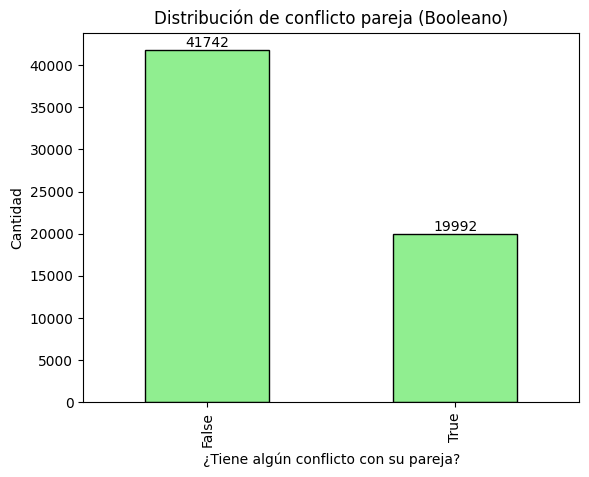

In [41]:
# Análisis de conflicto de pareja
#Crear gráfico de barras
conflicto_pareja_conteo = df_intento_suicidio['conflicto_pareja'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
conflicto_pareja_conteo.bar_label(conflicto_pareja_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Tiene algún conflicto con su pareja?')
plt.ylabel('Cantidad')
plt.title('Distribución de conflicto pareja (Booleano)')

# Mostrar gráfico
plt.show()

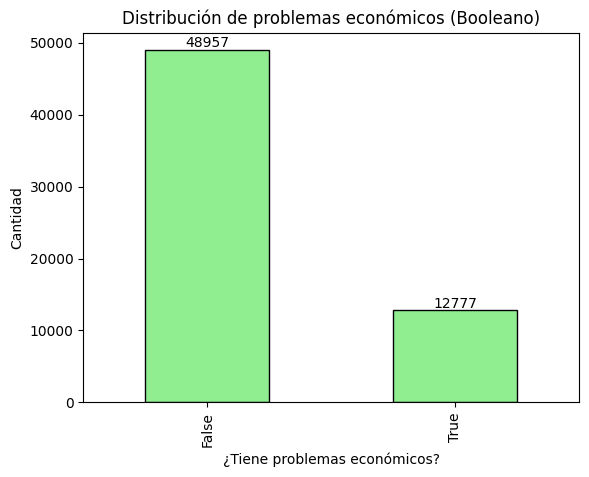

In [42]:
# Análisis de problemas económicos
#Crear gráfico de barras
problemas_economicos_conteo = df_intento_suicidio['problemas_economicos'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
problemas_economicos_conteo.bar_label(problemas_economicos_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Tiene problemas económicos?')
plt.ylabel('Cantidad')
plt.title('Distribución de problemas económicos (Booleano)')

# Mostrar gráfico
plt.show()

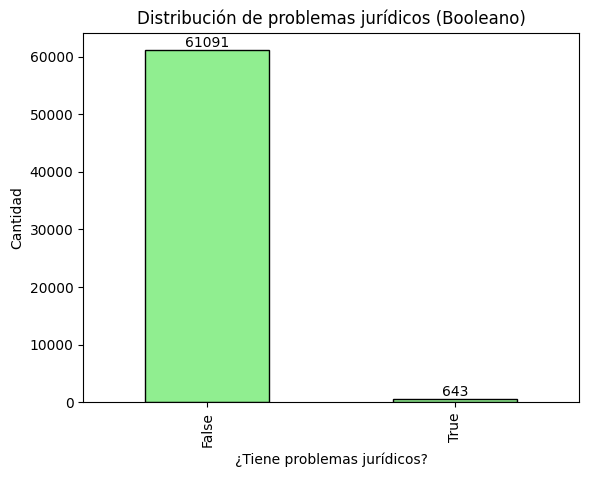

In [43]:
# Análisis de problemas jurídicos
#Crear gráfico de barras
problemas_juridicos_conteo = df_intento_suicidio['problemas_juridicos'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
problemas_juridicos_conteo.bar_label(problemas_juridicos_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Tiene problemas jurídicos?')
plt.ylabel('Cantidad')
plt.title('Distribución de problemas jurídicos (Booleano)')

# Mostrar gráfico
plt.show()

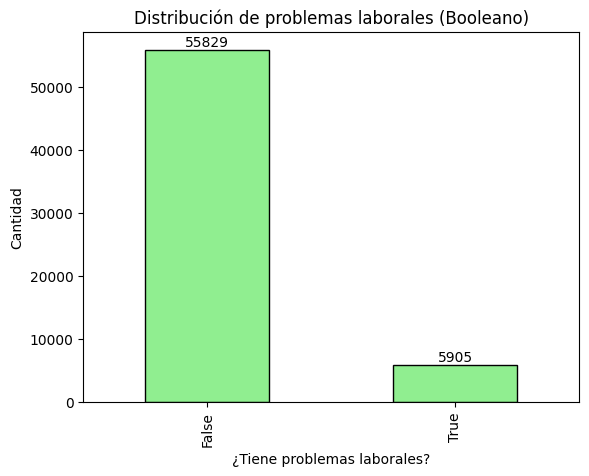

In [44]:
# Análisis de problemas laborales
#Crear gráfico de barras
problemas_laborales_conteo = df_intento_suicidio['problemas_laborales'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
problemas_laborales_conteo.bar_label(problemas_laborales_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Tiene problemas laborales?')
plt.ylabel('Cantidad')
plt.title('Distribución de problemas laborales (Booleano)')

# Mostrar gráfico
plt.show()

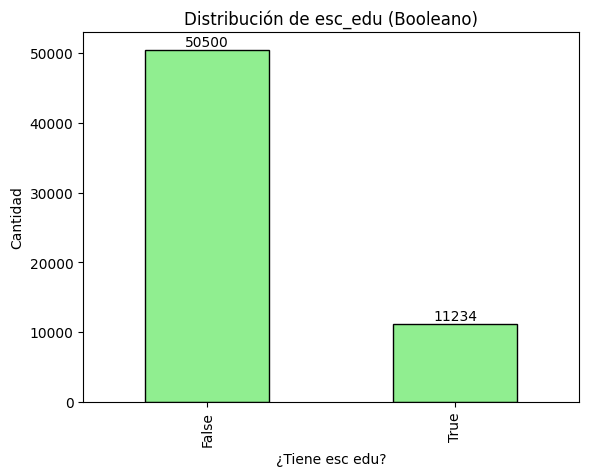

In [45]:
# Análisis de esc_edu
#Crear gráfico de barras
esc_educ_conteo = df_intento_suicidio['esc_educ'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
esc_educ_conteo.bar_label(esc_educ_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Tiene esc edu?')
plt.ylabel('Cantidad')
plt.title('Distribución de esc_edu (Booleano)')

# Mostrar gráfico
plt.show()

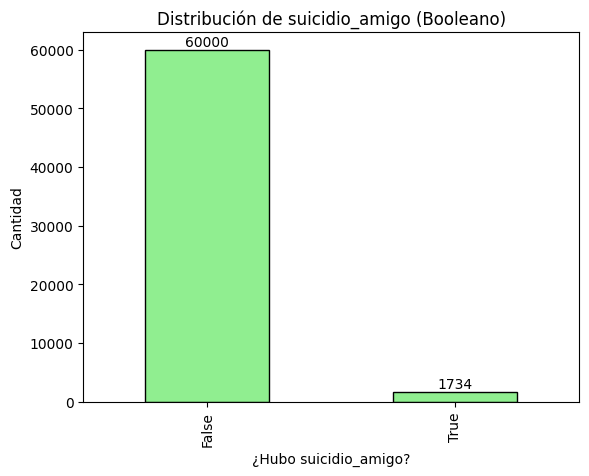

In [46]:
# Análisis de suicidio amigo
#Crear gráfico de barras
suicidio_amigo_conteo = df_intento_suicidio['suicidio_amigo'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
suicidio_amigo_conteo.bar_label(suicidio_amigo_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Hubo suicidio_amigo?')
plt.ylabel('Cantidad')
plt.title('Distribución de suicidio_amigo (Booleano)')

# Mostrar gráfico
plt.show()

### Análisis con Heatmap o mapa de calor

Convertimos las variables booleanas a int para calcular correlaciones en el mapa de calor.

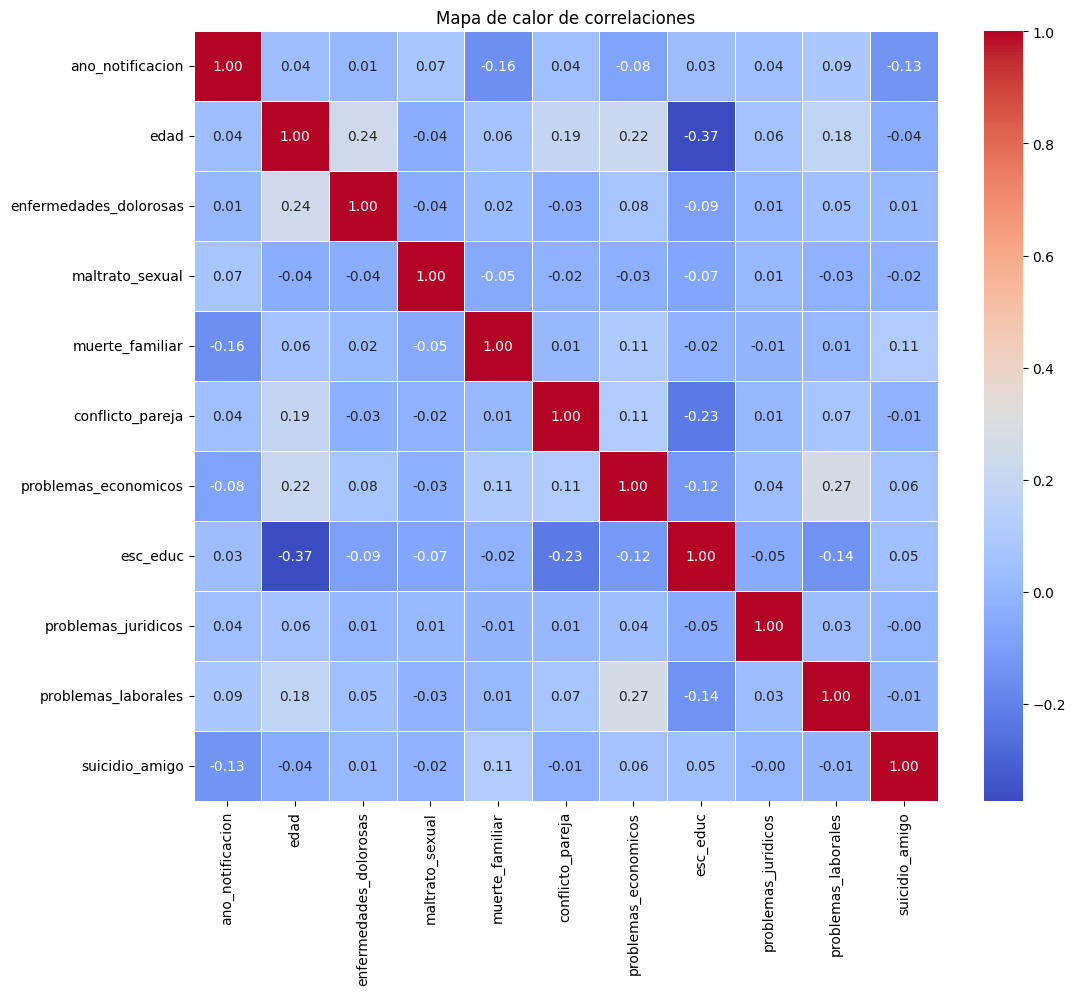

In [47]:
# --- Heatmap de correlaciones ---

# Convertimos las variables booleanas a int para calcular correlaciones
df_heatmap = df.copy()
boolean_columns = df_heatmap.select_dtypes(include=bool).columns
df_heatmap[boolean_columns] = df_heatmap[boolean_columns].astype(int)

# Solo tomamos variables numéricas para el heatmap
corr = df_heatmap.select_dtypes(include=[np.number]).corr()

# Gráfica
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

### Preparación del modelo

Para la preparación del modelo se excluirán las siguientes variables:

1. <b>poblacion_diferencial:</b> esta variable no nos da ningún valor significativo para el modelo.
2. <b>nombre_upz:</b> se excluye la variable nombre_upz debido que la variable localidad_residencia engloba a esta.
3. <b>edad:</b> se excluye la variable edad debido a que curso de vida engloba a esta.
4. <b>ano_notificacion:</b> esta variable es de tipo fecha y no representa un valor significativo para el modelo.   

In [48]:
# Se eliminan las variables
del df['poblacion_diferencial']
del df['nombre_upz']
del df['edad']
del df['ano_notificacion']

Se procede a declarar la variable objetivo y el vector de características.

In [49]:
# variable objetivo o target variable
X = df.drop(['clasificaciondelaconducta'], axis=1)
# vector de características o feature vector
y = df['clasificaciondelaconducta']

Se separa los datos entre un conjunto de entrenamiento y otro de pruebas.

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Revisamos el tamaño tanto del conjunto de pruebas como de entrenamiento de la variable objetivo. 

In [51]:
X_train.shape, X_test.shape

((142371, 13), (70124, 13))

### Feature Engineering

<b>Feature Engineering o Ingenería de características</b> es el proceso con el cual se transforman los datos brutos de las tuplas (filas) en información con el cual el modelo pueda trabajar mejor y así aumentar su predicción.

In [52]:
# Revisamos los tipos de datos de X_train
X_train.dtypes

localidad_residencia      object
Curso de vida             object
sexo                      object
niveleducativo            object
enfermedades_dolorosas      bool
maltrato_sexual             bool
muerte_familiar             bool
conflicto_pareja            bool
problemas_economicos        bool
esc_educ                    bool
problemas_juridicos         bool
problemas_laborales         bool
suicidio_amigo              bool
dtype: object

In [53]:
X_train.head()

,localidad_residencia,Curso de vida,sexo,niveleducativo,enfermedades_dolorosas,maltrato_sexual,muerte_familiar,conflicto_pareja,problemas_economicos,esc_educ,problemas_juridicos,problemas_laborales,suicidio_amigo
119232,Suba,Juventud,Hombre,Secundaria incompleta,False,False,False,True,False,False,False,False,False
87027,Kennedy,Juventud,Hombre,Secundaria incompleta,False,False,False,True,False,False,False,False,False
171880,Kennedy,Adultez,Mujer,Técnico o Tecnólogo completo,False,False,False,True,False,False,False,True,False
95052,Suba,Adultez,Hombre,Secundaria completa,False,False,False,False,False,False,False,True,False
23367,Kennedy,Adolescencia,Hombre,Secundaria completa,False,False,False,False,False,True,False,False,False


Procedemos a codificar todas las variables categóricas con la librería category_encoders.

In [54]:
import category_encoders as ce
# codificar variables categóricas con codificación ordinal

encoder = ce.OrdinalEncoder(cols=['localidad_residencia', 'Curso de vida', 'sexo', 'niveleducativo', 'enfermedades_dolorosas', 'maltrato_sexual','muerte_familiar','conflicto_pareja', 'problemas_economicos','esc_educ','problemas_juridicos','problemas_laborales','suicidio_amigo'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [55]:
# Revisamos la codificación ordinal del connunto de entrenamiento
X_train.head()

,localidad_residencia,Curso de vida,sexo,niveleducativo,enfermedades_dolorosas,maltrato_sexual,muerte_familiar,conflicto_pareja,problemas_economicos,esc_educ,problemas_juridicos,problemas_laborales,suicidio_amigo
119232,1,1,1,1,1,1,1,1,1,1,1,1,1
87027,2,1,1,1,1,1,1,1,1,1,1,1,1
171880,2,2,2,2,1,1,1,1,1,1,1,2,1
95052,1,2,1,3,1,1,1,2,1,1,1,2,1
23367,2,3,1,3,1,1,1,2,1,2,1,1,1


In [56]:
# Revisamos la codificación ordinal del conjunto de prueba
X_test.head()

,localidad_residencia,Curso de vida,sexo,niveleducativo,enfermedades_dolorosas,maltrato_sexual,muerte_familiar,conflicto_pareja,problemas_economicos,esc_educ,problemas_juridicos,problemas_laborales,suicidio_amigo
13458,4,1,2,3,1,1,1,2,1,1,1,1,1
143544,17,1,2,7,1,1,1,2,1,2,1,1,1
41779,11,3,2,1,1,1,1,2,1,2,1,1,1
156881,4,3,2,1,1,1,1,2,1,2,1,1,1
158269,8,1,2,8,1,1,1,1,1,1,1,1,1


### Clasificación de Random Forest (bosque aleatorio) con los parámetros actuales

In [57]:
# importar Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instanciar el clasificador 
rfc = RandomForestClassifier(random_state=0)
# ajustar el modelo
rfc.fit(X_train, y_train)
# Predecir el resultado del conjunto de pruebas 
y_pred = rfc.predict(X_test)
# Revisar la precisión 
from sklearn.metrics import accuracy_score
print('con 10 arboles de decición la precisión es de: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

con 10 arboles de decición la precisión es de: 0.7001


### Clasificación de Random Forest (bosque aleatorio) con 100 árboles de decisión

In [58]:
# instanciar el clasificador con n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# ajustar el modelo al conjunto de pruebas
rfc_100.fit(X_train, y_train)
# Predecir el resultado del conjunto de pruebas 
y_pred_100 = rfc_100.predict(X_test)
# Revisar la precisión 
print('con 100 arboles de decición la precisión es de: {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

con 100 arboles de decición la precisión es de: 0.7001


### Clasificación de Random Forest (bosque aleatorio) con 1000 árboles de decisión

In [55]:
# instanciar el clasificador con n_estimators = 1000
rfc_1000 = RandomForestClassifier(n_estimators=1000, random_state=0)
# ajustar el modelo al conjunto de pruebas
rfc_1000.fit(X_train, y_train)
# Predecir el resultado del conjunto de pruebas 
y_pred_1000 = rfc_1000.predict(X_test)
# Revisar la precisión 
print('con 1000 arboles de decición la precisión es de: {0:0.4f}'. format(accuracy_score(y_test, y_pred_1000)))

con 1000 arboles de decición la precisión es de: 0.7014


In [74]:
X = df_intento_suicidio.drop(['clasificaciondelaconducta'], axis=1)
y = df_intento_suicidio['clasificaciondelaconducta']

# Convertimos variables categóricas a numéricas con One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

### Encontrar las características más importantes con el modelo

In [59]:
# crear el clasificador n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# ajustar el modelo al conjunto de entrenamiento
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [60]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

localidad_residencia      0.403851
niveleducativo            0.240740
Curso de vida             0.083303
conflicto_pareja          0.048980
sexo                      0.036827
esc_educ                  0.032494
problemas_economicos      0.030078
muerte_familiar           0.028238
problemas_laborales       0.024875
maltrato_sexual           0.022220
enfermedades_dolorosas    0.020748
suicidio_amigo            0.017450
problemas_juridicos       0.010196
dtype: float64

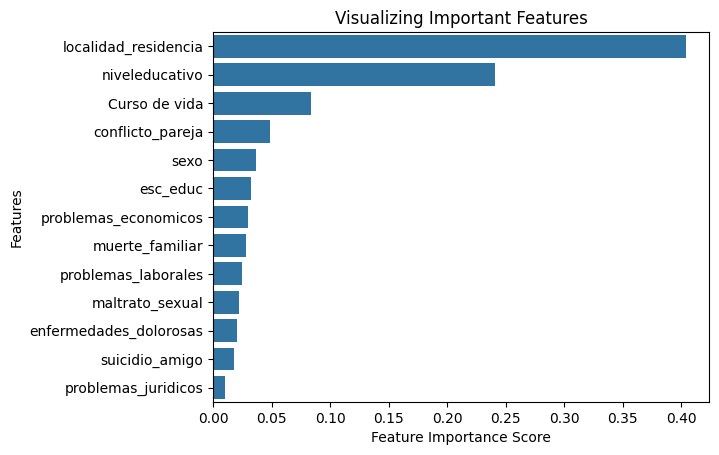

In [61]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

### Matriz de Confusión

Confusion matrix

 [[44967  4748]
 [16280  4129]]


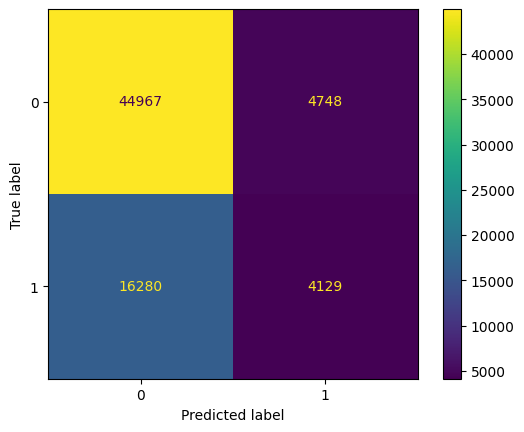

In [64]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

### Reporte de clasificación

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

    Ideacin suicida       0.73      0.90      0.81     49715
Intento de Suicidio       0.47      0.20      0.28     20409

           accuracy                           0.70     70124
          macro avg       0.60      0.55      0.55     70124
       weighted avg       0.66      0.70      0.66     70124

